Question 1 & 2 (Multi Layer Perceptron)

In [1]:
from __future__ import print_function
%tensorflow_version 1.x
import tensorflow as tf
import keras

TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True

In [4]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [0]:
image = X_train[0]

In [7]:
image.shape

(28, 28)

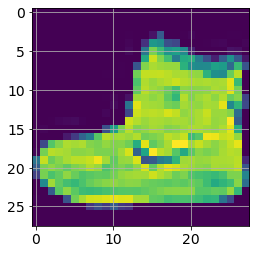

In [8]:
plt.imshow(image)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
y_train.shape

(60000,)

In [11]:
y_test.shape

(10000,)

In [0]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [0]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [0]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [0]:
X_train = X_train.reshape(60000,784)

In [0]:
X_test = X_test.reshape(10000,784)

In [0]:
learning_rate = 0.001
training_epochs = 2000
cost_history = np.empty(shape = [1], dtype = float)
n_dim = X_train.shape[1]
batch_size = 100

In [0]:
n_hidden_1 = 256
n_hidden_2 = 256
n_hidden_3 = 256
n_hidden_4 = 256
n_input = 784
n_classes = 10

In [0]:
x = tf.placeholder(tf.float32, [None, n_input])
W = tf.Variable(tf.zeros([n_dim, n_classes]))
b = tf.Variable(tf.zeros([n_classes]))
y = tf.placeholder(tf.float32, [None, n_classes])

In [0]:
def multilayer_perceptron(x, weights, biases):

    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)

    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)

    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)

    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)

    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer

In [0]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_classes]))}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_classes]))}

# Construct model
pred = multilayer_perceptron(x, weights, biases)

In [0]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [0]:
init = tf.global_variables_initializer()
cost_history = []
accuracy_history = []

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = 600

        for i in range(total_batch):
          batchs=((X_train[i*100:(i+1)*100],y_train[i*100:(i+1)*100]) for i in range(int(len(y_train)/100)))
          batch_x, batch_y = batchs.__next__()
          _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
          # Compute average loss
          avg_cost += c / total_batch

        # Display logs per epoch step
        if epoch % 200 == 0:
          correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
          # Calculate accuracy
          accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
          acu_temp = accuracy.eval(feed_dict={x: X_test, y: y_test})
          #append the accuracy to the list
          accuracy_history.append(acu_temp)
          #append the cost history
          cost_history.append(avg_cost)
          print("Epoch:", '%03d' % (epoch), "- cost=", "{:.3f}".format(avg_cost), "- Accuracy=",acu_temp)

Epoch: 000 - cost= 4.539 - Accuracy= 0.1804
Epoch: 200 - cost= 0.003 - Accuracy= 0.3291
Epoch: 400 - cost= 0.002 - Accuracy= 0.3388
Epoch: 600 - cost= 0.001 - Accuracy= 0.3433
Epoch: 800 - cost= 0.001 - Accuracy= 0.3468
Epoch: 1000 - cost= 0.001 - Accuracy= 0.3492
Epoch: 1200 - cost= 0.001 - Accuracy= 0.3509
Epoch: 1400 - cost= 0.001 - Accuracy= 0.3528
Epoch: 1600 - cost= 0.001 - Accuracy= 0.3541
Epoch: 1800 - cost= 0.001 - Accuracy= 0.3559


Question 3 & 4 (Single Layer Perceptron)

In [0]:
learning_rate = 0.0001
training_epochs = 5000
cost_history = np.empty(shape = [1], dtype = float)
n_dim = X_train.shape[1]
batch_size = 100

In [0]:
n_hidden_1 = 256
n_input = 784
n_classes = 10

In [0]:
x = tf.placeholder(tf.float32, [None, n_input])
W = tf.Variable(tf.zeros([n_dim, n_classes]))
b = tf.Variable(tf.zeros([n_classes]))
y = tf.placeholder(tf.float32, [None, n_classes])

In [0]:
def singlelayer_perceptron(x, weights, biases):

    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)

    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer

In [0]:
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_input, n_hidden_1])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_1, n_classes]))}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'out': tf.Variable(tf.truncated_normal([n_classes]))}

pred = singlelayer_perceptron(x, weights, biases)

In [0]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [27]:
init = tf.global_variables_initializer()
cost_history = []
accuracy_history = []

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = 600

        for i in range(total_batch):
          batchs=((X_train[i*100:(i+1)*100],y_train[i*100:(i+1)*100]) for i in range(int(len(y_train)/100)))
          batch_x, batch_y = batchs.__next__()
          _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
          # Compute average loss
          avg_cost += c / total_batch

        # Display logs per epoch step
        if epoch % 200 == 0:
          correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
          # Calculate accuracy
          accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
          acu_temp = accuracy.eval(feed_dict={x: X_test, y: y_test})
          #append the accuracy to the list
          accuracy_history.append(acu_temp)
          #append the cost history
          cost_history.append(avg_cost)
          print("Epoch:", '%03d' % (epoch), "- cost=", "{:.3f}".format(avg_cost), "- Accuracy=",acu_temp)

Epoch: 000 - cost= 2.197 - Accuracy= 0.4179
Epoch: 200 - cost= 0.000 - Accuracy= 0.6464
Epoch: 400 - cost= 0.000 - Accuracy= 0.6329
Epoch: 600 - cost= 0.000 - Accuracy= 0.5941
Epoch: 800 - cost= 0.000 - Accuracy= 0.5856
Epoch: 1000 - cost= 0.000 - Accuracy= 0.574
Epoch: 1200 - cost= 0.000 - Accuracy= 0.5702
Epoch: 1400 - cost= 0.000 - Accuracy= 0.5699
Epoch: 1600 - cost= 0.000 - Accuracy= 0.5468
Epoch: 1800 - cost= 0.000 - Accuracy= 0.5312
Epoch: 2000 - cost= 0.000 - Accuracy= 0.5441
Epoch: 2200 - cost= 0.000 - Accuracy= 0.5359
Epoch: 2400 - cost= 0.000 - Accuracy= 0.5148
Epoch: 2600 - cost= 0.000 - Accuracy= 0.5226
Epoch: 2800 - cost= 0.000 - Accuracy= 0.5086
Epoch: 3000 - cost= 0.000 - Accuracy= 0.5069
Epoch: 3200 - cost= 0.000 - Accuracy= 0.5007
Epoch: 3400 - cost= 0.000 - Accuracy= 0.4849
Epoch: 3600 - cost= 0.000 - Accuracy= 0.4725
Epoch: 3800 - cost= 0.000 - Accuracy= 0.4446
Epoch: 4000 - cost= 0.000 - Accuracy= 0.4164
Epoch: 4200 - cost= 0.000 - Accuracy= 0.4068
Epoch: 4400 - co